# 3. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
#Load Data
df = pd.read_csv('df_bmsales.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRPperUnit,Years_Open
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,b,a,Supermarket Type1,3735.1380,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,b,c,Supermarket Type2,443.4228,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,b,a,Supermarket Type1,2097.2700,8.092457,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,c,Grocery Store,732.3800,9.484115,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,c,c,Supermarket Type1,994.7052,6.031512,26


In [5]:
df.shape

(8523, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  MRPperUnit                 7060 non-null   float64
 13  Years_Open                 8523 non-null   int64

Let's look at the distribution of target variable 'Item_Outlet_Sales'

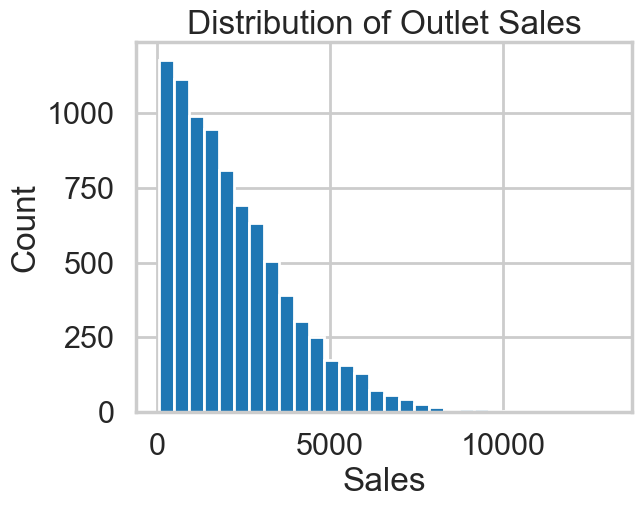

In [7]:
df.Item_Outlet_Sales.hist(bins=30)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Outlet Sales');

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,MRPperUnit,Years_Open
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,7060.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,12.745886,15.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.006126,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,1.686016,4.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,6.777734,9.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,11.000717,14.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,16.343771,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,50.775731,28.000000


Text(0.5, 1.0, 'Item Outlet Sales by MRPperUnit')

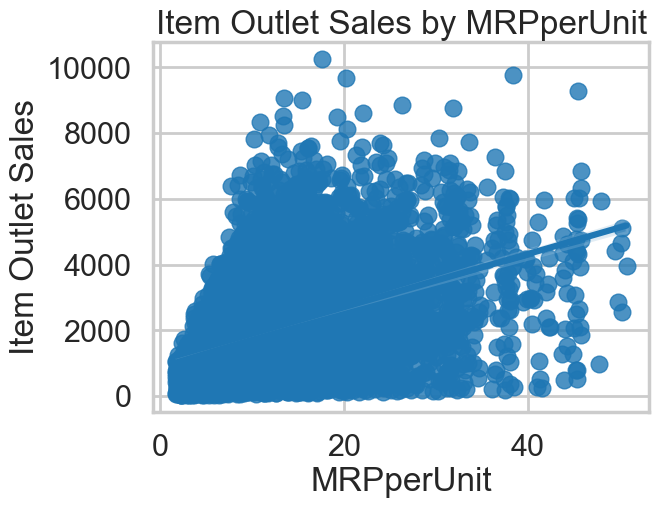

In [9]:
sns.regplot(y='Item_Outlet_Sales', x='MRPperUnit', data=df, fit_reg = True)
plt.xlabel('MRPperUnit')
plt.ylabel('Item Outlet Sales')
plt.title('Item Outlet Sales by MRPperUnit')

Text(0.5, 1.0, 'Item Outlet Sales by Item MRP')

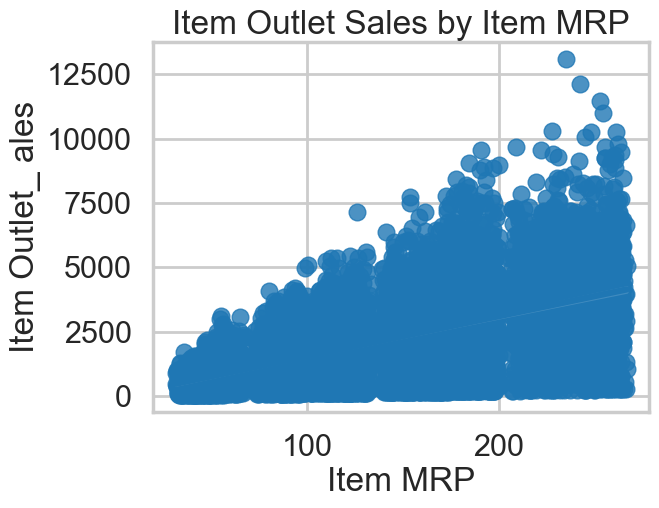

In [10]:
sns.regplot(y='Item_Outlet_Sales', x='Item_MRP', data=df, fit_reg = True)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet_ ales')
plt.title('Item Outlet Sales by Item MRP')

Let's look at the sales by year of establishment

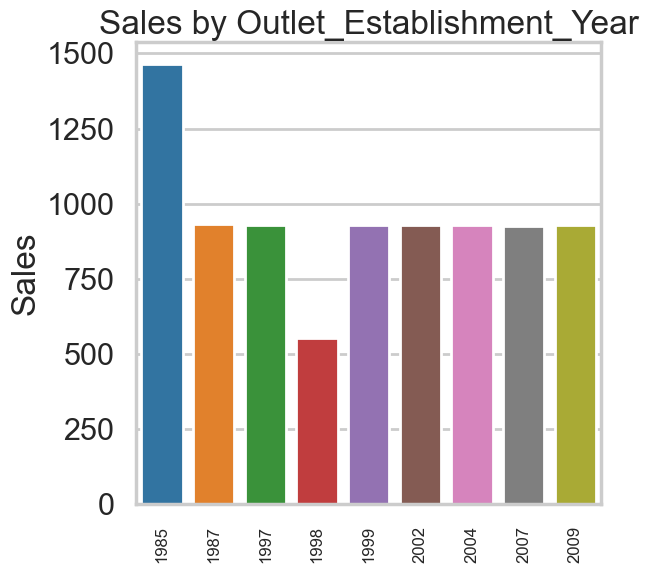

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.xticks(fontsize=12, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('')
plt.title('Sales by Outlet_Establishment_Year');

Let's look at the distribution of sales by number of years open

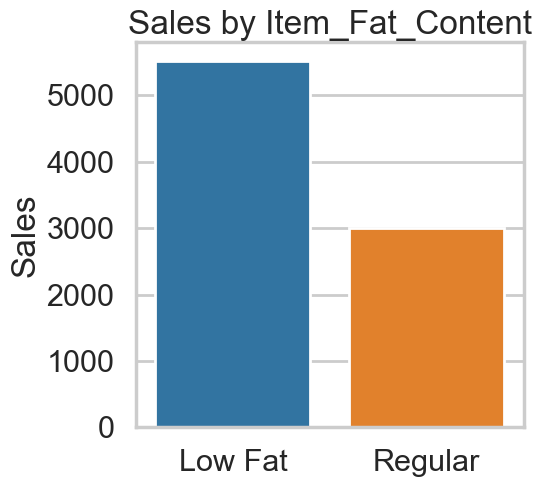

In [12]:
# plot item_fat_content
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=df)
plt.ylabel('Sales')
plt.xlabel('')
plt.title('Sales by Item_Fat_Content');
plt.show()

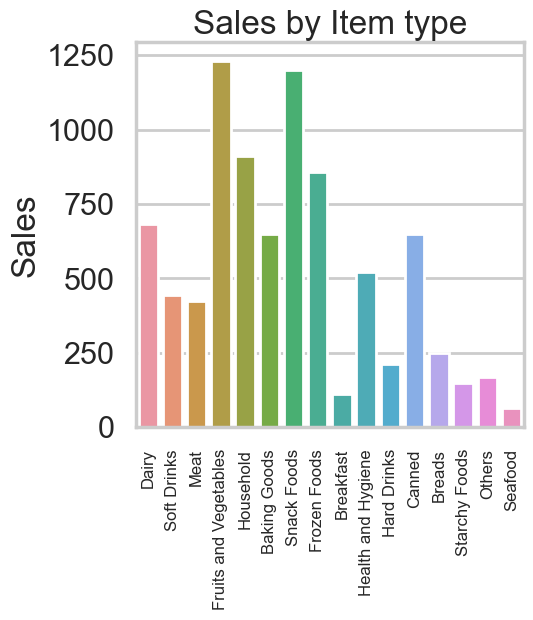

In [13]:
# plot item_fat_content
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Type', data=df)
plt.xticks(fontsize=12, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('')
plt.title('Sales by Item type');
plt.show()

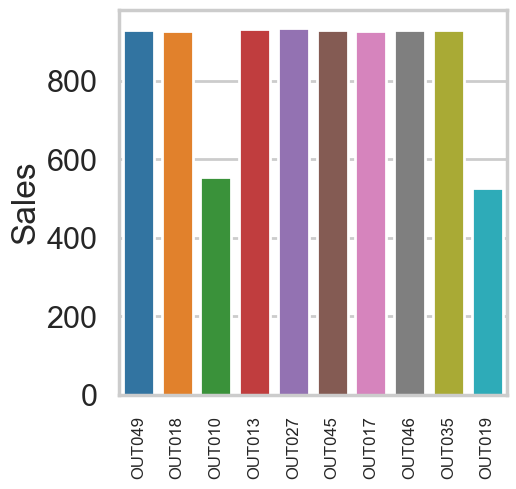

In [14]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Identifier', data=df)
plt.xticks(fontsize=12, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('')
plt.show()

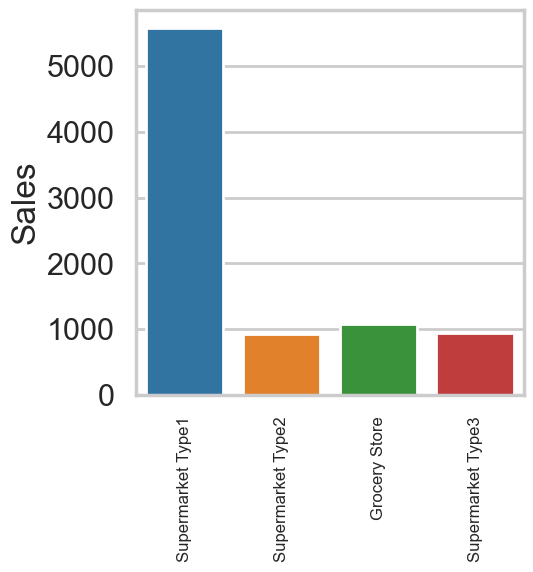

In [15]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Type', data=df)
plt.xticks(fontsize=12, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('')
plt.show()

### Feature correlation heatmap

<Axes: >

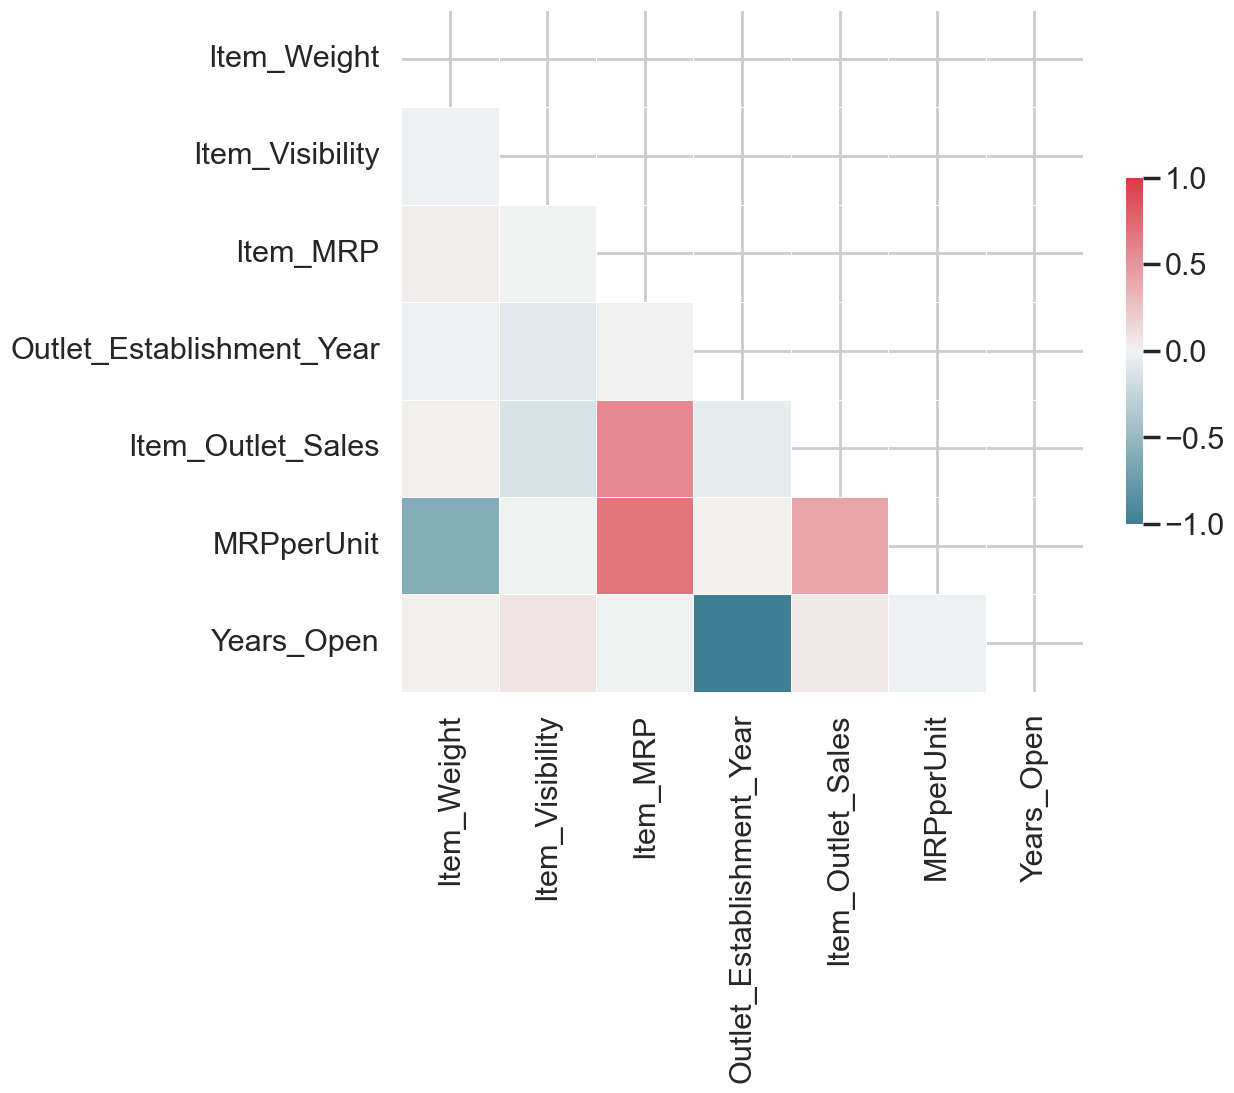

In [16]:
# correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=False,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
)


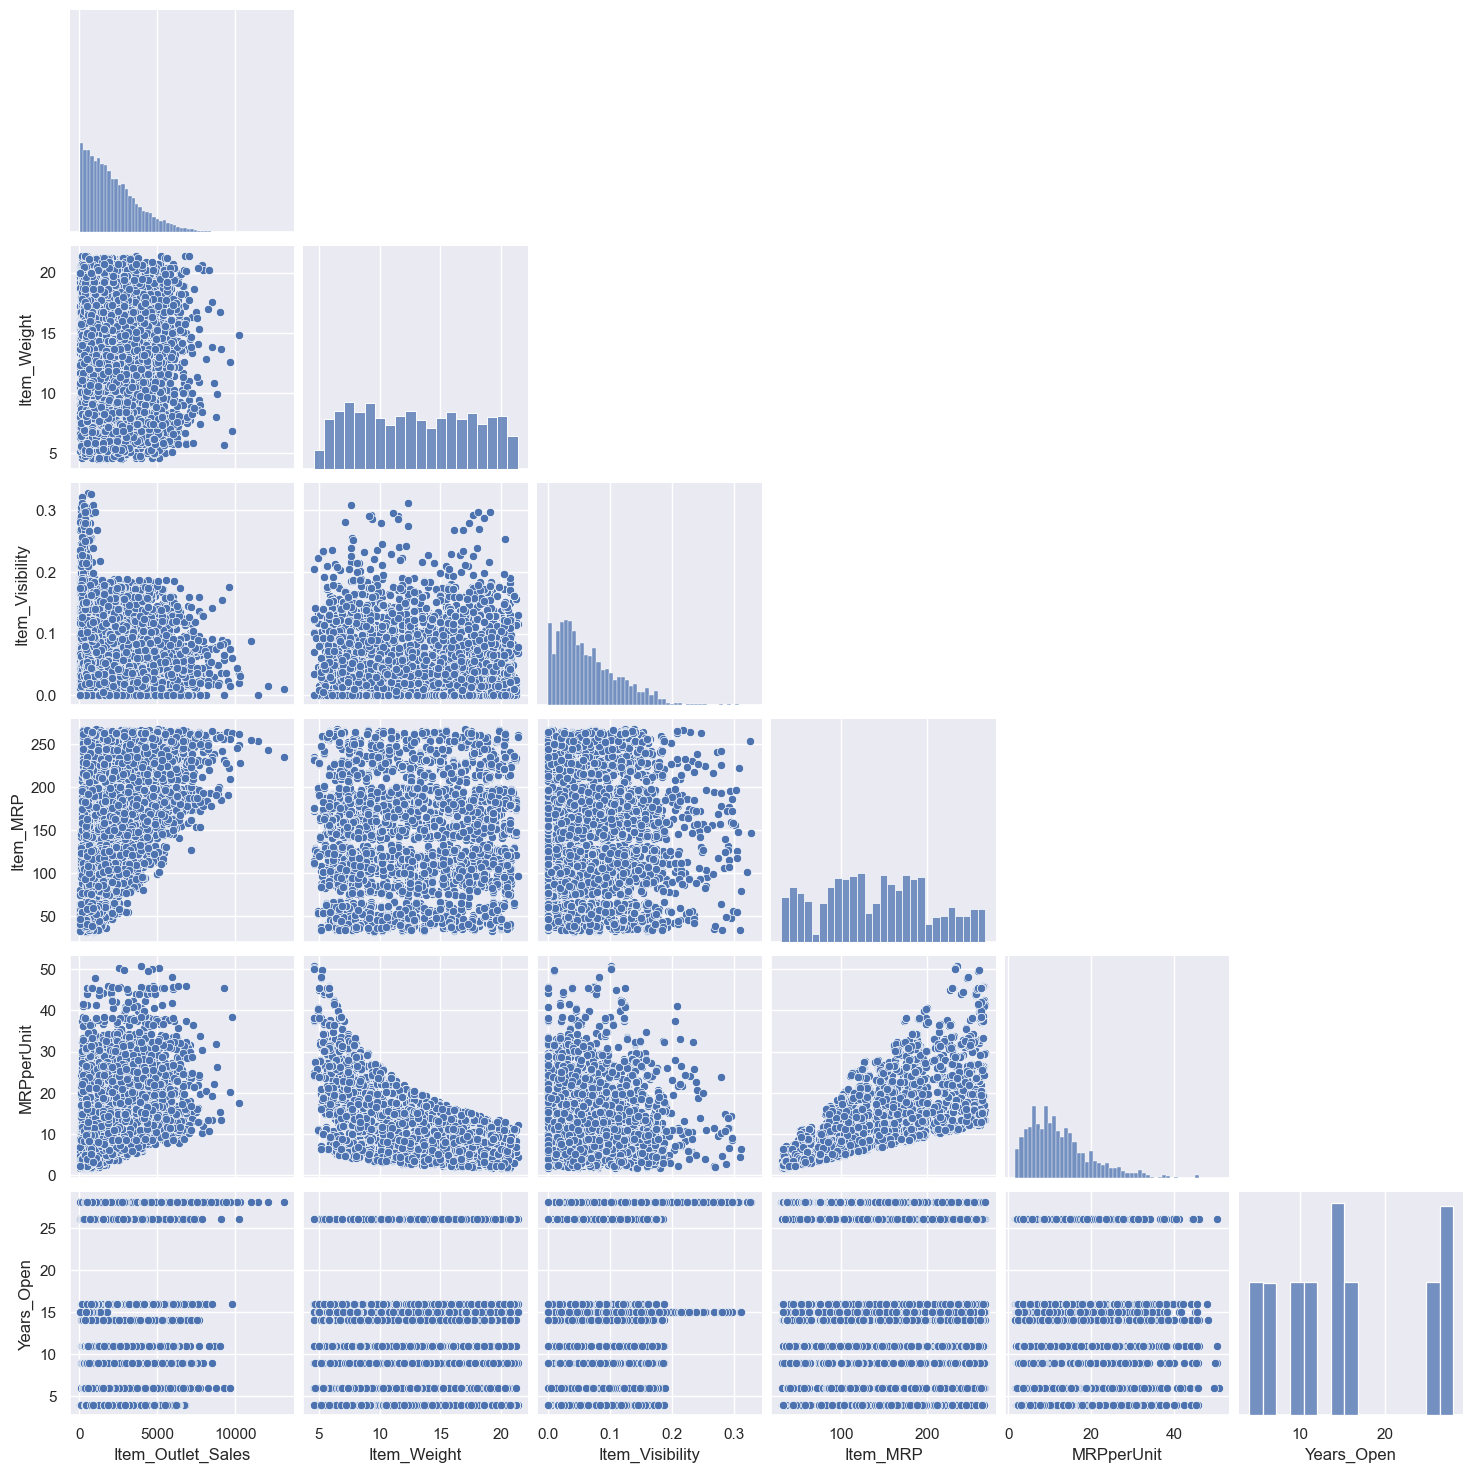

In [17]:
# Make a pairplot of the numerical data],
sns.set(rc={'figure.figsize':(15,30)})
sns.pairplot(df, x_vars=["Item_Outlet_Sales", "Item_Weight", "Item_Visibility", "Item_MRP", "MRPperUnit", "Years_Open"], y_vars = ["Item_Outlet_Sales", "Item_Weight", "Item_Visibility", "Item_MRP", "MRPperUnit", "Years_Open"], corner = True)
             

In [18]:
df2 = df.drop(columns=['Item_Identifier'])

In [19]:
cat_bins=['a','b','c']

In [20]:
#list of non-numerical columns
cat_list = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Type']

In [21]:
#check the unique value by column
Col_ohe=[]
for col in cat_list:
    Col_ohe.extend(list(df[col].unique()))
    

In [22]:
#list of category type columns
blist = ['Outlet_Size','Outlet_Location_Type']

In [23]:
#list of numerical columns
col_list = ['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']
num_list = list(df.drop(columns=col_list).drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Weight'],axis=1))

In [24]:
num_list

['Item_Visibility', 'Item_MRP', 'MRPperUnit', 'Years_Open']

In [25]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import math
import datetime



In [26]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Bin_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#combine numeric and categorical pipelines
preprocess_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('bincat', Bin_transformer, blist),
        ('cat', categorical_transformer, cat_list)
    ])

In [27]:
# fit the pipelines to the training data
preprocess_pipe.fit_transform(df2)

# apply the pipelines to the training and test data
scaled_data = preprocess_pipe.transform(df2)


In [28]:
scaled_data = pd.DataFrame.sparse.from_spmatrix(scaled_data, columns = (num_list+blist+Col_ohe))

In [29]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

In [30]:
svd = TruncatedSVD(n_components=10, random_state=42)
svd.fit(scaled_data)

TruncatedSVD(n_components=10, random_state=42)

In [31]:
x_svd =svd.transform(scaled_data)
x_svd

array([[ 1.19668542,  2.69221208, -0.36355257, ..., -0.38241327,
         0.31628409,  0.60188148],
       [ 2.17743268, -1.22627921, -1.76875269, ...,  0.10402843,
         0.41163707,  0.39165634],
       [ 1.18619616, -0.32361879, -0.7742732 , ..., -0.42392391,
         0.32100462,  0.55916043],
       ...,
       [ 1.35645881, -0.8932996 , -1.29900502, ...,  0.82218213,
        -0.28643841, -0.5183064 ],
       [ 2.16490877, -0.09293948, -0.65353916, ...,  0.0458659 ,
         0.12937993,  0.60407926],
       [ 0.66543832, -1.39270938, -0.58434647, ...,  0.56117965,
         0.04638335,  0.20499946]])

In [34]:
# components
svd.components_

array([[-2.17701494e-02, -5.63168831e-04, -1.29497007e-03,
         3.08947712e-02,  5.04396533e-01,  6.87670442e-01,
         3.17628695e-01,  1.57664809e-01,  3.53080139e-02,
         1.36666064e-02,  5.81027623e-03,  3.53723668e-02,
         3.72970798e-02,  4.67463446e-02,  6.97007278e-02,
         1.23357969e-02,  3.04251119e-02,  5.29953603e-02,
         2.28078613e-02,  9.04368842e-03,  3.30113442e-03,
         6.71904732e-02,  2.49887512e-02,  8.30391075e-03,
         3.98912491e-02,  9.25595727e-02,  5.33712216e-02,
         6.74451781e-02,  6.53544307e-03,  7.08602144e-02,
         3.85927466e-02,  5.41940451e-02,  1.83283542e-02,
         3.35154791e-02,  4.64266922e-02,  2.90561419e-01,
         6.74451781e-02,  7.08602144e-02],
       [-3.28566709e-02,  6.94505243e-01,  7.03237329e-01,
        -1.29331254e-01, -5.15763449e-03, -7.68109257e-03,
         9.36905689e-04,  9.41726154e-03, -1.10354295e-02,
         3.28937445e-03,  9.05552256e-05,  2.85882980e-03,
         3.91

In [35]:
df_comp = pd.DataFrame(svd.components_, columns = list(scaled_data))

In [36]:
df_comp.head()

,Item_Visibility,Item_MRP,MRPperUnit,Years_Open,Outlet_Size,Outlet_Location_Type,Low Fat,Regular,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,OUT049,OUT018,OUT010,OUT013,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,-0.021770,-0.000563,-0.001295,0.030895,0.504397,0.687670,0.317629,0.157665,0.035308,0.013667,0.005810,0.035372,0.037297,0.046746,0.069701,0.012336,0.030425,0.052995,0.022808,0.009044,0.003301,0.067190,0.024989,0.008304,0.039891,0.092560,0.053371,0.067445,0.006535,0.070860,0.038593,0.054194,0.018328,0.033515,0.046427,0.290561,0.067445,0.070860
1,-0.032857,0.694505,0.703237,-0.129331,-0.005158,-0.007681,0.000937,0.009417,-0.011035,0.003289,0.000091,0.002859,0.003917,-0.001380,0.004635,0.001589,-0.007939,0.010421,-0.000656,-0.002577,0.000763,0.008076,-0.002343,0.000646,-0.001009,-0.009475,0.012296,0.015783,-0.015310,-0.027962,0.015128,0.010221,0.006218,0.004464,-0.016319,0.038852,0.015783,-0.027962
2,0.382950,0.144826,0.063625,0.814576,0.042767,0.053592,-0.058403,-0.006297,-0.004956,-0.000681,0.001618,-0.005917,0.000161,-0.009366,-0.003633,-0.002893,-0.009896,-0.009337,-0.000996,-0.002518,0.000146,-0.007544,-0.006889,-0.002000,0.025885,0.092655,-0.104939,-0.109022,0.085417,0.138920,-0.080171,-0.058175,-0.020057,-0.035213,0.111301,-0.205899,-0.109022,0.138920
3,0.905236,-0.035495,-0.001461,-0.361209,-0.034840,0.034326,0.016075,0.058714,0.010852,0.001954,0.005364,0.010245,0.014891,0.008307,0.018115,0.001180,-0.009197,-0.004847,-0.000643,-0.000989,0.001721,0.013442,0.002155,0.002237,0.054840,-0.064637,0.046240,0.065924,0.020354,-0.087836,0.034112,0.017395,-0.009474,-0.002128,0.075194,0.021508,0.065924,-0.087836
4,-0.082769,0.019827,-0.011627,-0.172269,-0.067545,0.459567,-0.317810,0.008076,-0.019299,-0.005833,-0.002021,-0.016460,-0.027340,-0.027668,-0.035462,-0.012286,-0.025889,-0.055244,-0.003594,-0.009762,-0.001946,-0.041019,-0.022057,-0.003855,0.066360,-0.064471,-0.059833,0.228904,-0.061224,0.099860,-0.059498,-0.082409,-0.185938,-0.191486,0.005136,-0.643635,0.228904,0.099860


<Axes: >

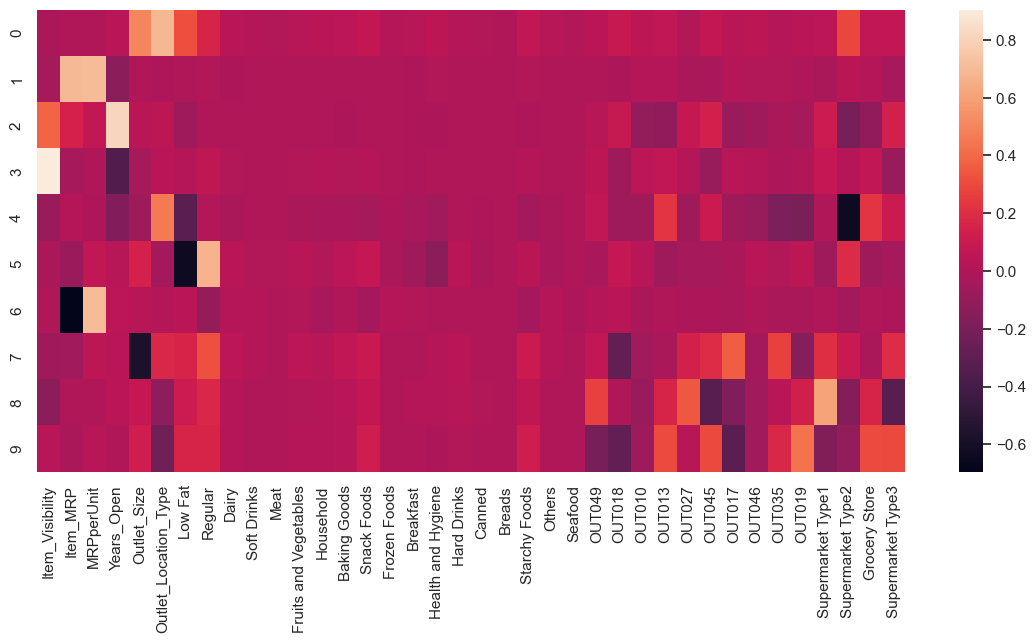

In [37]:
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)